# Метод Нестерова и обыкновенные дифференциальные уравнения

По материалам статьи [[W.Su, S. Boyd, E.Candes 2015]](https://arxiv.org/pdf/1503.01243.pdf)

## Постановка задачи

$$
\min_{x \in \mathbb{R}^n} f(x)
$$
- $f$ - непрерывная и дифференцируемая
- ограничений на $x$ нет
- для решения задачи можно использовать только значение функции и её градиент

## И снова градиентный спуск...

$$
x_{k+1} = x_{k} - s f'(x_k)
$$

**Теорема.** 

Пусть 

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ ограничена снизу
- $s = \mathrm{const}$ и $0 < s < \frac{2}{L}$

Тогда для градиентного метода выполнено:
$$
\lim\limits_{k \to \infty} f'(x_k) = 0,
$$
а функция монотонно убывает $f(x_{k+1}) < f(x_k)$.

## Интерпретация градиентного спуска 

Рассмотрим обыкновенное диференциальное уравнение вида:
$$
\frac{dx}{dt} = -f'(x(t)) \quad x(0) = x_0
$$
и дискретизуем его на равномерной сетке с шагом $\alpha$:
$$
\frac{x_{k+1} - x_k}{s} = -f'(x_k),
$$
где $x_k \equiv x(t_k)$ и $s = t_{k+1} - t_k$ - шаг сетки.

Отсюда получаем выражение для $x_{k+1}$
$$
x_{k+1} = x_k - s f'(x_k),
$$
которое в точности совпадает с выраением для градиентного спуска.

Такая схема называется явной или прямой схемой Эйлера.

**Вопрос:** какая схема называется неявной или обратной?

In [1]:
import numpy as np

alpha = 10
def gradf(t):
    return alpha*t

x0 = 1
a = 0
b = 1
h = 1e-2
N = int((b - a) / h)
x = [x0]
for i in xrange(N):
    x.append(x[i] - h * gradf(x[i]))

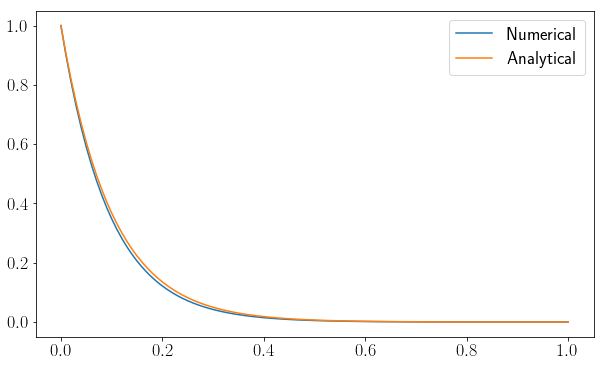

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
t = np.linspace(a, b, N+1, endpoint=True)
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Numerical")
plt.plot(t, x0 * np.exp(-alpha*t), label="Analytical")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

## Концепция нижних оценок скоростей сходимости

## Нижняя оценка скорости сходимости



## Оценка сходимости для градиентного спуска



## Оптимальный метод Нестерова

- $x_0 = y_0$
- $s \leq \frac{1}{L}$, где $L$ константа Липшица для градиента
- 
$$
\begin{align*}
& x_k = y_{k-1} - sf'(y_{k-1})\\
& y_k = x_k + \frac{k-1}{k+2}(x_k - x_{k-1})
\end{align*}
$$

- Сходимость
$$
f(x_k) - f^* \leq O\left(\frac{\| x_k - x_0\|^2}{sk^2}\right)
$$

## Интерпретация метода Нестерова

- Если градиентному спуску можно поставить в соответствие ОДУ, то какое ОДУ можно поставить в соответствие методу Нестерова?
- Вот такое
$$
\ddot{x} + \frac{3}{t}\dot{x} + f'(x) = 0, \quad x(0) = x_0 \quad \dot{x}(0) = 0
$$

Доказательство на доске

## Сходимость траектории к точке минимума $f$

**Теорема.**

Пусть $X(t)$ единственное глобальное pешение ОДУ для любой выпуклой функции $f$, у градиента которой может быть бесконечная константа Липшица.
Тогда для $t > 0$
$$
f(X(t)) - f^* \leq \frac{2\| x^* - x_0\|^2}{t^2}
$$

Доказательство на доске

## Влияние "трения" - $\frac{3}{t}\dot{x}$

- Метод Нестерова сходится немонотонно к решению из-за наличия "момента импульса"
- Для небольших $t$ множитель $\frac{3}{t}$ велик - предотвращение осцилляций
- Для больших $t$ множитель $\frac{3}{t}$ мал - система сильнее подверждена осцилляциям

### Toy problem

$$
f(x_1, x_2) = 2 \cdot 10^{-2}x_1^2 + 5 \cdot 10^{-3}x^2_2 \to \min, \; x_0 = (1, 1)
$$

In [3]:
def gradf(x):
    return np.array([0.04 * x[0], 0.01 * x[1]])

def f(x):
    return 0.02 * x[0]**2 + 0.005 * x[1]**2

In [67]:
def acc_gd(gradf, x0, s, tol=1e-6, maxiter=1000, disp=True):
    y = x0.copy()
    x_prev = x0.copy()
    grad = gradf(y)
    k = 1.0
    hist = [x0]
    while True:
        if np.linalg.norm(gradf(x_prev)) < tol and disp:
            print("Tolerance achieved")
            break
        if k == maxiter and disp:
            print("Maxiter exceeds!")
            break
        x = y - s * grad
        y = x + (k - 1) / (k + 2) * (x - x_prev)
        x_prev = x
        grad = gradf(y)
        k += 1
        hist.append(x)
    return x, hist

In [68]:
def gd(f, gradf, x0, linesearch, tol=1e-6, maxiter=1000, disp=True):
    x = x0.copy()
    grad = gradf(x)
    k = 0
    hist = [x0]
    while True:
        if np.linalg.norm(grad) < tol and disp:
            print("Tolerance achieved!")
            break
        if k == maxiter and disp:
            print("Maxiter exceeds!")
            break
        s = linesearch(f, gradf, x, -grad)
        x = x - s * grad
        grad = gradf(x)
        k += 1
        hist.append(x)
    return x, hist

In [6]:
def cg_quad(A, b, x0, tol=1e-6):
    x = x0
    hist = [x]
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) > tol:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        hist.append(x)
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x, hist

In [7]:
def constant_step(f, gradf, x, descent_dir):
    return s

def backtracking(f, grad_f, x, descent_dir):
    alpha = 1
    beta1 = 0.1
    rho = 0.7
    while f(x + alpha * descent_dir) >= f(x) + beta1 * alpha * grad_f(x).dot(descent_dir):
        alpha *= rho
    return alpha

In [8]:
s = 0.25
x_acc, hist_acc = acc_gd(gradf, np.array([1, 1]), s)
x_gd, hist_gd = gd(f, gradf, np.array([1, 1]), constant_step)
x_adapt_gd, hist_adapt_gd = gd(f, gradf, np.array([1, 1]), backtracking)
x_cg, hist_cg = cg_quad(np.array([[4 * 1e-2, 0], [0, 1e-2]]), np.zeros(2), np.array([1, 1]))
print("Nesterov f* = {}".format(f(x_acc)))
print("GD f* = {}".format(f(x_gd)))
print("Adaptive GD f* = {}".format(f(x_adapt_gd)))
print("Conjugate GD f* = {}".format(f(x_cg)))

Tolerance achieved
Maxiter exceeds!
Tolerance achieved!
Nesterov f* = 8.73382832096e-12
GD f* = 3.34795186591e-05
Adaptive GD f* = 4.94216107969e-11
Conjugate GD f* = 9.87039096498e-34


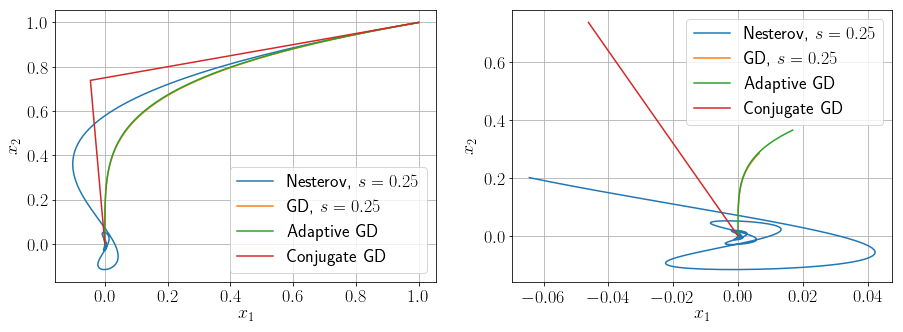

In [9]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.plot([x[0] for x in hist_acc], [x[1] for x in hist_acc], label="Nesterov, $s = {}$".format(s))
ax.plot([x[0] for x in hist_gd], [x[1] for x in hist_gd], label="GD, $s = {}$".format(s))
ax.plot([x[0] for x in hist_adapt_gd], [x[1] for x in hist_adapt_gd], label="Adaptive GD")
ax.plot([x[0] for x in hist_cg], [x[1] for x in hist_cg], label="Conjugate GD")
ax.grid("on")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.legend(fontsize=18)
ax.tick_params(labelsize=18)

ax = fig.add_subplot(122)
acc_zoom_idx = 60
gd_zoom_idx = 500
gd_adapt_idx = 100
ax.plot([x[0] for x in hist_acc[acc_zoom_idx:]], [x[1] for x in hist_acc[acc_zoom_idx:]], label="Nesterov, $s = {}$".format(s))
ax.plot([x[0] for x in hist_gd[gd_zoom_idx:]], [x[1] for x in hist_gd[gd_zoom_idx:]], label="GD, $s = {}$".format(s))
ax.plot([x[0] for x in hist_adapt_gd[gd_adapt_idx:]], [x[1] for x in hist_adapt_gd[gd_adapt_idx:]], label="Adaptive GD")
ax.plot([x[0] for x in hist_cg[1:]], [x[1] for x in hist_cg[1:]], label="Conjugate GD")
ax.grid("on")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.legend(fontsize=18)
ax.tick_params(labelsize=18)

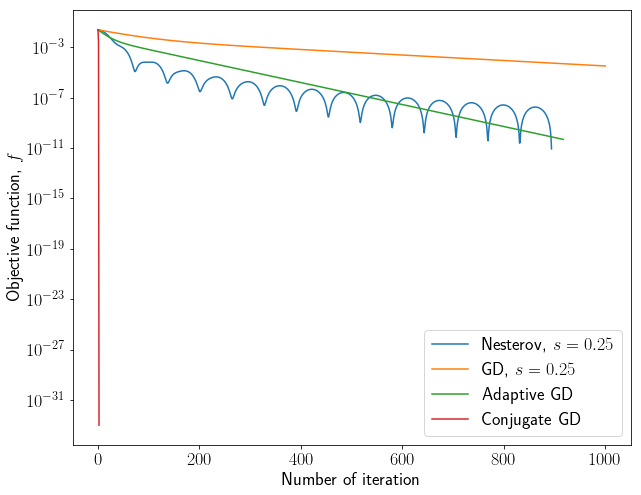

In [10]:
plt.figure(figsize=(10, 8))
plt.semilogy([f(x) for x in hist_acc], label="Nesterov, $s = {}$".format(s))
plt.semilogy([f(x) for x in hist_gd], label="GD, $s = {}$".format(s))
plt.semilogy([f(x) for x in hist_adapt_gd], label="Adaptive GD")
plt.semilogy([f(x) for x in hist_cg], label="Conjugate GD")
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Number of iteration", fontsize=18)
plt.ylabel("Objective function, $f$", fontsize=18)

### В чём идея ускорения в методе Нестерова по сравнению с градиентным спуском?

- Градиентный спуск - шаг длины $s$ вдоль траектории
- Метод Нестерова - шаг длины <span style="color:red">$\sqrt{s}$</span> вдоль траектории
- Для малых $s$ метод Нестерова движется быстрее!

**Однако!** На графике видно, как с приближением к точке минимума метод Нестерова начинает осциллировать.

### Как выбирать шаг для повышения устойчивости?

- Дискретизация ОДУ
$$
\frac{x(t + \Delta t) - 2x(t) + x(t - \Delta t)}{\Delta t^2} + \frac{3}{t} \frac{x(t) - x(t - \Delta t)}{\Delta t} + f'(X(t)) = 0
$$
или
$$
x(t + \Delta t) = \left(2 - \frac{3}{t} \Delta t\right) x(t) - x(t - \Delta t) \left(1 - \frac{3}{t} \Delta t\right) - f'(x(t))\Delta t^2 
$$
- Характеристическое уравнение
- Критерий устойчивости
- Следствие

**Упражнение** Проведите аналогичный анализ для ОДУ, соответствующего градиентному спуску

### Магическая константа $3$

- $\frac{k-1}{k+2} = 1 - \frac{3}{k} + O\left(\frac{1}{k^2}\right)$
- Заменим $3$ на некоторое число $r$:
$$
\ddot{x} + \frac{r}{t}\dot{x} + f'(x) = 0, \quad x(0) = x_0 \quad \dot{x}(0) = 0
$$

- Пусть $r > 3$
    - **Теорема** Решение ОДУ удовлетворяет следующему неравенству
    $$
    f(x(t)) - f^* \leq \frac{(r-1)^2 \| x^* - x_0 \|}{2t^2}
    $$
    - Аналог метода Нестерова
    $$
    \begin{align*}
    & x_k = y_{k-1} - sf'(y_{k-1})\\
    & y_k = x_k + \frac{k-1}{k+ r - 1}(x_k - x_{k-1})
    \end{align*}
    $$
    - **Теорема** Последовательность $\{x_k\}$, полученная из вышеприведённого метода, при $s \leq \frac{1}{L}$ удовлетворяет следующему выражению:
    $$
    f(x_k) - f^* \leq \frac{(r-1)^2 \| x^* - x_0 \|^2}{2s (k+ r - 2)^2}
    $$
    
    

- Пусть $r < 3$
    - тогда доказательство предыдущей теоремы не работает
    - Существуют контрпримеры, для которых обратно квадратичный порядок уменьшения значения целевой функции нарушается!
    - Однако с дополнительными ограничениями на выпуклость
    $$
    (f - f^*)^{\frac{r-1}{2}}
    $$
    оптимальный порядок снова присутствует!

## Реальная задача: логистическая регрессия

In [79]:
import sklearn.datasets as skldata

C = 1
X, y = skldata.load_svmlight_file("german.numer")


import scipy.special as scspec

def logloss(w, X=X, y=y, C=C):
    return np.linalg.norm(w)**2 / 2 +  C * np.mean(np.logaddexp(np.zeros(X.shape[0]), -y * X.dot(w)))

def logloss_grad(w, X=X, y=y, C=C):
    denom = scspec.expit(-y * X.dot(w))
    return w - C * X.T.dot(y * denom) / X.shape[0]

In [80]:
import scipy.optimize as scopt
scopt.check_grad(logloss, logloss_grad, np.random.rand(X.shape[1]), X, y, C)

9.7891237642678672e-07

In [81]:
s = 1e-3
x0 = np.random.randn(X.shape[1])
x_acc, hist_acc = acc_gd(logloss_grad, x0.copy(), s)
x_gd, hist_gd = gd(logloss, logloss_grad, x0.copy(), constant_step)
x_adapt_gd, hist_adapt_gd = gd(logloss, logloss_grad, x0.copy(), backtracking)
hist_cg = []
res_cg = scopt.minimize(logloss, x0.copy(), method="CG", jac=logloss_grad, callback=lambda x: hist_cg.append(x))
print(res_cg.message)
print("Nesterov (s = {}): f* = {}, accuracy = {}".format(s, logloss(x_acc), np.mean(y == np.sign(X.dot(x_acc)))))
print("GD (s = {}): f* = {}, accuracy = {}".format(s, logloss(x_gd), np.mean(y == np.sign(X.dot(x_gd)))))
print("Adaptive GD: f* = {}, accuracy = {}".format(logloss(x_adapt_gd), np.mean(y == np.sign(X.dot(x_adapt_gd)))))
print("Conjugate GD (Polak-Rebiere): f* = {}, accuracy = {}".format(logloss(res_cg.x), np.mean(y == np.sign(X.dot(res_cg.x)))))

Maxiter exceeds!
Maxiter exceeds!
Maxiter exceeds!
Desired error not necessarily achieved due to precision loss.
Nesterov (s = 0.001): f* = 0.55997431374, accuracy = 0.725
GD (s = 0.001): f* = 2.20171027158, accuracy = 0.715
Adaptive GD: f* = 0.566522917125, accuracy = 0.725
Conjugate GD (Polak-Rebiere): f* = 0.559889021932, accuracy = 0.725


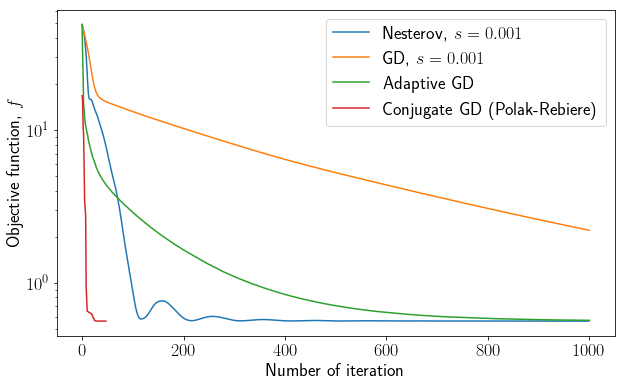

In [82]:
plt.figure(figsize=(10, 6))
plt.semilogy([logloss(x) for x in hist_acc], label="Nesterov, $s = {}$".format(s))
plt.semilogy([logloss(x) for x in hist_gd], label="GD, $s = {}$".format(s))
plt.semilogy([logloss(x) for x in hist_adapt_gd], label="Adaptive GD")
plt.semilogy([logloss(x) for x in hist_cg], label="Conjugate GD (Polak-Rebiere)")
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Number of iteration", fontsize=18)
plt.ylabel("Objective function, $f$", fontsize=18)

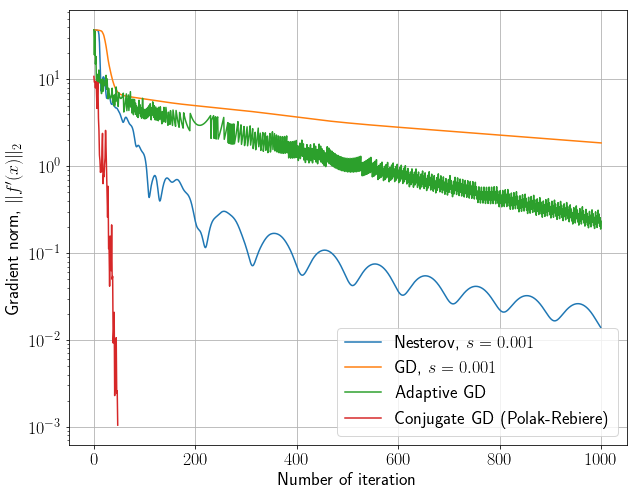

In [83]:
plt.figure(figsize=(10, 8))
plt.semilogy([np.linalg.norm(logloss_grad(x)) for x in hist_acc], label="Nesterov, $s = {}$".format(s))
plt.semilogy([np.linalg.norm(logloss_grad(x)) for x in hist_gd], label="GD, $s = {}$".format(s))
plt.semilogy([np.linalg.norm(logloss_grad(x)) for x in hist_adapt_gd], label="Adaptive GD")
plt.semilogy([np.linalg.norm(logloss_grad(x)) for x in hist_cg], label="Conjugate GD (Polak-Rebiere)")
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid("on")
plt.xlabel("Number of iteration", fontsize=18)
plt.ylabel("Gradient norm, $\|f'(x)\|_2$", fontsize=18)

## Адаптивный выбор шага в методе Нестерова

## Заключение